In [2]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

In [3]:
import numpy
import torch
import typing

from holo.prettyFormats import prettyPrint

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"using device: {device}")

using device: cuda:0


In [5]:
import handleDatas
import train
import basicModels

def cell():
    global handleDatas, train, basicModels
    import importlib
    handleDatas = importlib.reload(handleDatas)
    train = importlib.reload(train)
    basicModels = importlib.reload(basicModels)

cell();

In [6]:
#datashandler = handleDatas.Cifar100_Datas(
#    fromTrainSource=None, maxSamples=None, trainProp=0.8,
#    batchSizeTrain=256, batchSizeTest=256)

datashandler = handleDatas.HandleImagesClassifDatas.merge(
    #handleDatas.MNIST_Datas(
    #    fromTrainSource=None, maxSamples=None, trainProp=0.8, batchSizeTrain=256, batchSizeTest=256),
    #handleDatas.FashionMNIST_Datas(
    #    fromTrainSource=None, maxSamples=None, trainProp=0.8, batchSizeTrain=256, batchSizeTest=256),
    handleDatas.Cifar10_Datas(
        fromTrainSource=None, maxSamples=None, trainProp=0.8, batchSizeTrain=256, batchSizeTest=256),
    #handleDatas.Cifar100_Datas(
    #    fromTrainSource=None, maxSamples=None, trainProp=0.8, batchSizeTrain=256, batchSizeTest=256),
    trainProp=0.8, batchSizeTrain=256, batchSizeTest=256)

loaded Cifar10(total: 60000), train: 48000 [188 batches] | test: 12000 [47 batches]
loaded Merged[Cifar10](total: 60000), train: 48000 [188 batches] | test: 12000 [47 batches]


In [ ]:
model, optim, loss = basicModels.BasicImageClassifModel.get_Cifar_like_32x32x3(
    device=device, nbClasses=datashandler.nbClasses, modelConfig="medium")
basicModels.countLayersparameters(model)
trainer = train.TrainerClassif(model=model, optimizer=optim, criterion=loss, device=device)

# test the model
_ = model(datashandler.full_dataset[0]['image'].to(device))

+----------------------+------------+
|       Modules        | Parameters |
+----------------------+------------+
| CNN_block1.0.weight  |    432     |
| CNN_block2.0.weight  |   4_608    |
| CNN_block2.1.weight  |     32     |
|  CNN_block2.1.bias   |     32     |
| CNN_block3.0.weight  |   9_216    |
| CNN_block4.0.weight  |   18_432   |
| CNN_block5.0.weight  |   73_728   |
| CNN_block6.0.weight  |  294_912   |
| CNN_block6.1.weight  |    256     |
|  CNN_block6.1.bias   |    256     |
| outputBlock.2.weight |   40_960   |
|  outputBlock.2.bias  |     10     |
+----------------------+------------+
Total Trainable Params: 442_874


In [12]:
trainer.train_model_classif(datasHandler=datashandler, nbEpoches=10, history=hist);

Epoch 11, train: (loss: 0.2699, accuracy: 90.58%), test: (loss: 0.6776, accuracy: 79.27%), lr: 1.0000e-03
Epoch 12, train: (loss: 0.2331, accuracy: 91.82%), test: (loss: 0.6282, accuracy: 81.07%), lr: 1.0000e-03
Epoch 13, train: (loss: 0.203, accuracy: 92.92%), test: (loss: 0.6327, accuracy: 80.28%), lr: 1.0000e-03
Epoch 14, train: (loss: 0.1717, accuracy: 94.18%), test: (loss: 0.6808, accuracy: 80.71%), lr: 1.0000e-03
Epoch 15, train: (loss: 0.1403, accuracy: 95.19%), test: (loss: 0.6592, accuracy: 81.17%), lr: 1.0000e-03
Epoch 16, train: (loss: 0.1323, accuracy: 95.41%), test: (loss: 0.6516, accuracy: 81.88%), lr: 1.0000e-03
Epoch 17, train: (loss: 0.1192, accuracy: 95.94%), test: (loss: 0.653, accuracy: 81.40%), lr: 1.0000e-03
Epoch 18, train: (loss: 0.1015, accuracy: 96.65%), test: (loss: 0.8458, accuracy: 78.72%), lr: 1.0000e-03
Epoch 19, train: (loss: 0.101, accuracy: 96.61%), test: (loss: 0.8015, accuracy: 80.35%), lr: 1.0000e-03
Epoch 20, train: (loss: 0.1036, accuracy: 96.44%)

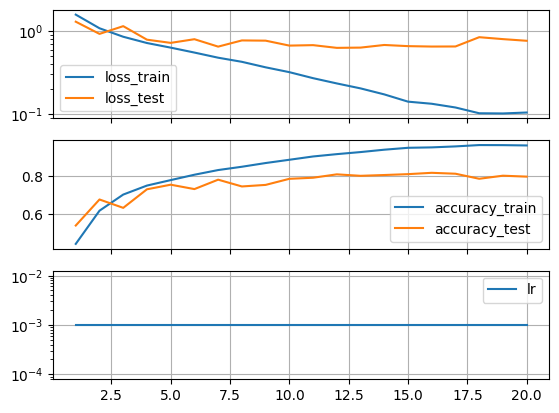

In [16]:
trainer.history.plot();

In [14]:
print(("\n" + ' '*8).join(map(str, trainer.history)))
def cell():
    bestTrain = trainer.history[max(range(len(trainer.history)), key=lambda i:trainer.history[i].train.accuracy())]
    bestTest = trainer.history[max(range(len(trainer.history)), key=lambda i:trainer.history[i].test.accuracy())]
    print(' ' * 4 + f"-> best accuracy, train: {bestTrain.train.accuracy():.2%} (epoch {bestTrain.epochID}), "
          f"test: {bestTest.test.accuracy():.2%} (epoch {bestTest.epochID})")
cell(); del cell

Epoch 1, train: (loss: 1.587, accuracy: 44.07%), test: (loss: 1.303, accuracy: 53.84%), lr: 1.0000e-03
        Epoch 2, train: (loss: 1.085, accuracy: 61.73%), test: (loss: 0.9272, accuracy: 67.69%), lr: 1.0000e-03
        Epoch 3, train: (loss: 0.8561, accuracy: 70.31%), test: (loss: 1.15, accuracy: 63.24%), lr: 1.0000e-03
        Epoch 4, train: (loss: 0.719, accuracy: 75.10%), test: (loss: 0.789, accuracy: 73.12%), lr: 1.0000e-03
        Epoch 5, train: (loss: 0.6322, accuracy: 78.00%), test: (loss: 0.7218, accuracy: 75.56%), lr: 1.0000e-03
        Epoch 6, train: (loss: 0.5511, accuracy: 80.86%), test: (loss: 0.7996, accuracy: 73.22%), lr: 1.0000e-03
        Epoch 7, train: (loss: 0.4775, accuracy: 83.35%), test: (loss: 0.6502, accuracy: 78.23%), lr: 1.0000e-03
        Epoch 8, train: (loss: 0.4258, accuracy: 85.11%), test: (loss: 0.7729, accuracy: 74.62%), lr: 1.0000e-03
        Epoch 9, train: (loss: 0.3652, accuracy: 87.09%), test: (loss: 0.7679, accuracy: 75.45%), lr: 1.0000e-0

In [17]:
def cell():
    conf = trainer.history[-1].test.confusionMatrix
    #print(conf.matrix[0, :].T)
    #print(conf.matrix[65, 65], conf.matrix[65, :])
    
    with numpy.printoptions(threshold=100_000, linewidth=100_000):
        print(conf.matrix)
    print()

    for clsIndex in range(datashandler.nbClasses):
        print(f"class: {clsIndex}, precision:{conf.classPrecision(clsIndex):.2%}, "
              f"hitRate: {conf.classHitRate(clsIndex):.2%}")
    print()
    
    prettyPrint(conf.worstK_confusions(10), 
                specificCompact={tuple}, specificFormats={numpy.float64:lambda x:f"{x:.4g}"})
cell(); del cell

[[ 967   20   37   31   26   12    9   10   29   46]
 [   4  990    1    2    1    1    2    1    4   42]
 [  66    7 1016  144  130   86  122   45   18   19]
 [   8    5   28  761   41  160   37   23    4   10]
 [  10    0   28   44  839   29   26   21    3    3]
 [   6    1   27  124   25  781   11   30    0    6]
 [   3    4   25   40   16   15 1004    5    2    2]
 [  11    2   17   38   88   57    9 1045    6   19]
 [  94   66   22   33   15   17   21    4 1137   51]
 [   8   66    2   10    3    3    2    8    9 1042]]

class: 0, precision:81.47%, hitRate: 82.16%
class: 1, precision:94.47%, hitRate: 85.27%
class: 2, precision:61.46%, hitRate: 84.46%
class: 3, precision:70.66%, hitRate: 62.02%
class: 4, precision:83.65%, hitRate: 70.86%
class: 5, precision:77.25%, hitRate: 67.27%
class: 6, precision:89.96%, hitRate: 80.77%
class: 7, precision:80.88%, hitRate: 87.67%
class: 8, precision:77.88%, hitRate: 93.81%
class: 9, precision:90.37%, hitRate: 84.03%

[
    (0.06617038875103391,